In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

<Axes: >

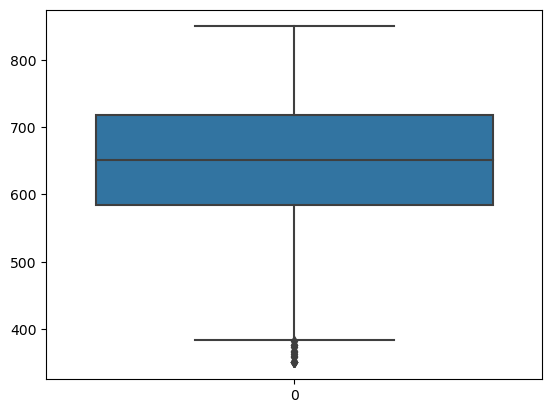

In [7]:
sns.boxplot(df.CreditScore)

<Axes: >

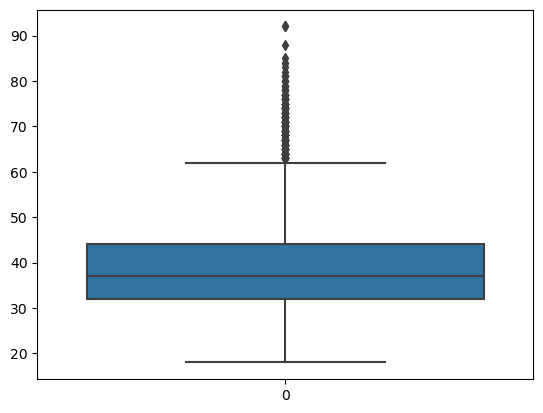

In [8]:
sns.boxplot(df.Age)

<Axes: >

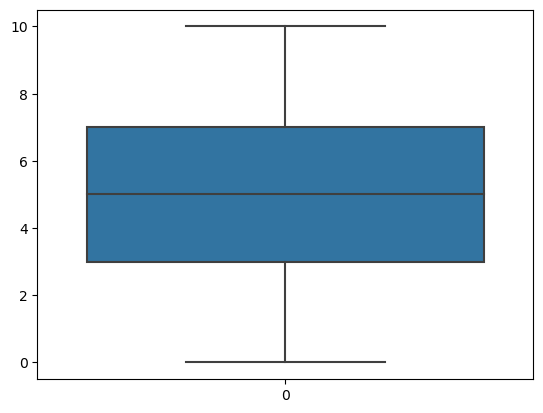

In [9]:
sns.boxplot(df.Tenure)

<Axes: >

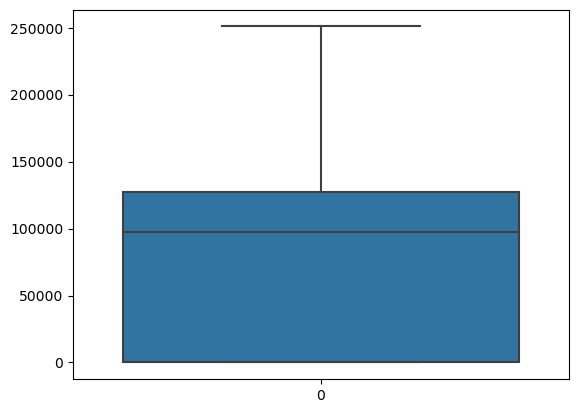

In [10]:
sns.boxplot(df.Balance)

<Axes: >

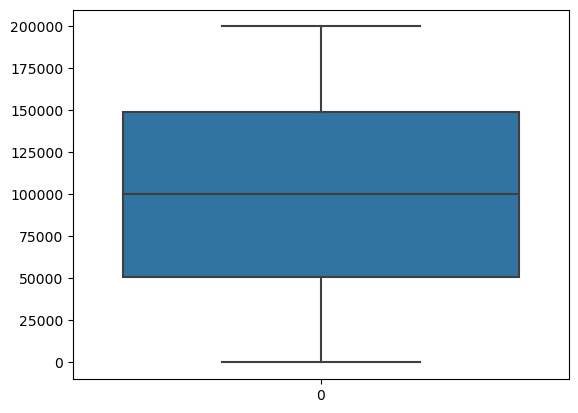

In [11]:
sns.boxplot(df.EstimatedSalary)

In [12]:
df = df.replace('Male', 1).replace('Female', 0)

In [13]:
df.corr(numeric_only=True)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

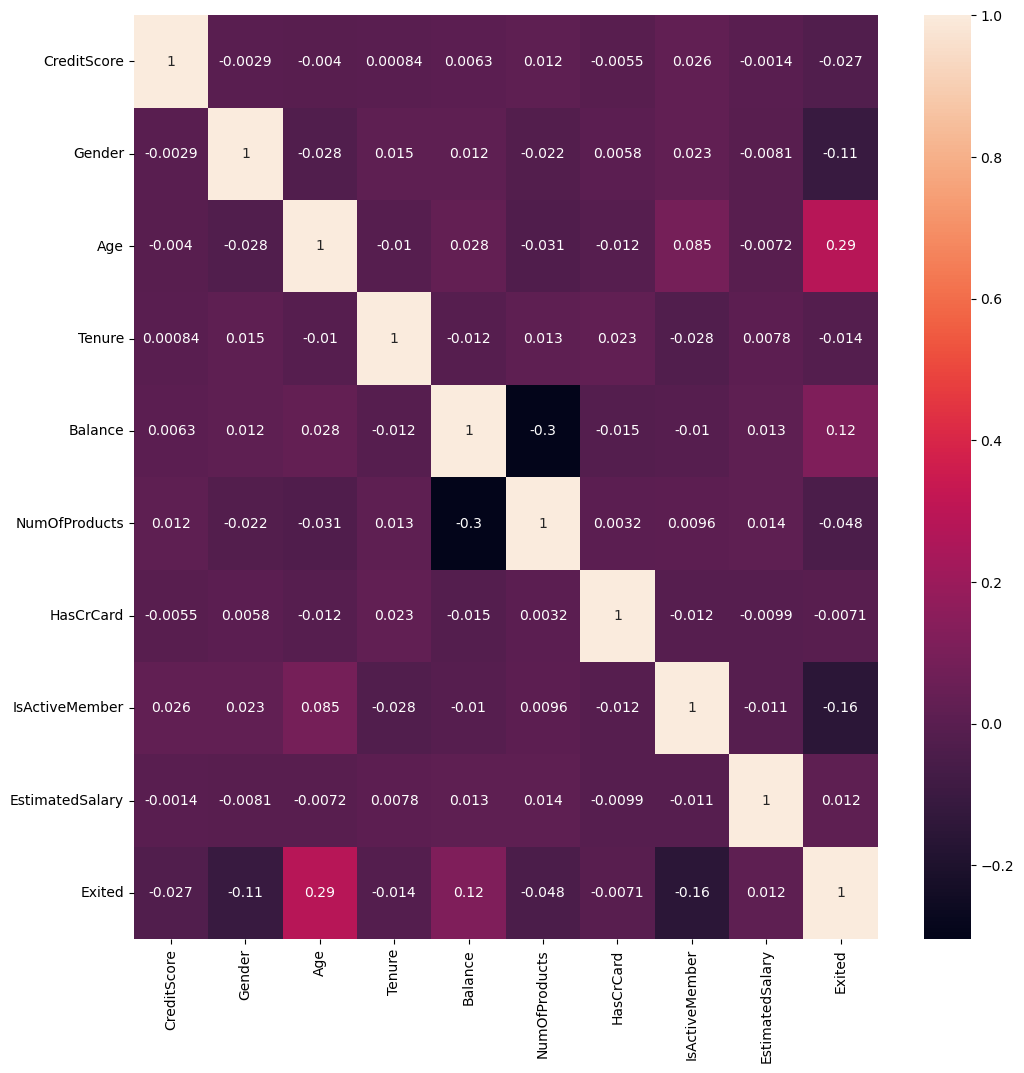

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
df = df.replace('France', 0).replace('Germany', 1).replace('Spain', 2)

<Axes: >

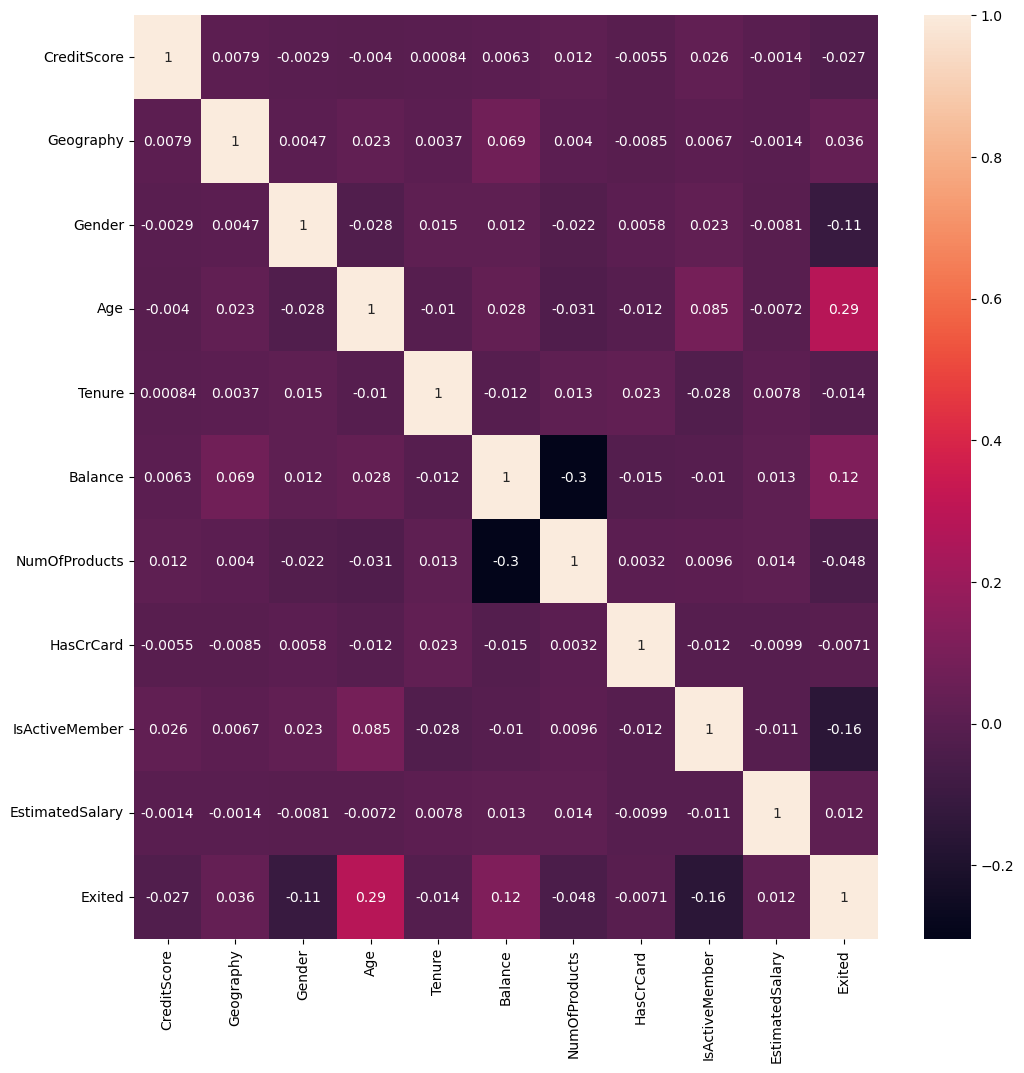

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix

# Data Spliting

In [19]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [20]:
X.shape, y.shape

((10000, 10), (10000,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=21)

# Scalling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

# Modeling

### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(f'Train accuracy of the model is: {round(accuracy_score(y_train, model.predict(X_train))*100,2)} %')
print(f'Train precision of the model is: {round(precision_score(y_train, model.predict(X_train))*100,2)} %')
print(f'Train recall of the model is: {round(recall_score(y_train, model.predict(X_train))*100,2)} %')
print('-'*40)
print(f'Test accuracy of the model is: {round(accuracy_score(y_test, y_pred)*100,2)} %')
print(f'Test precision of the model is: {round(precision_score(y_test, y_pred)*100,2)} %')
print(f'Test recall of the model is: {round(recall_score(y_test, y_pred)*100,2)} %')

Train accuracy of the model is: 80.47 %
Train precision of the model is: 57.07 %
Train recall of the model is: 17.78 %
----------------------------------------
Test accuracy of the model is: 80.8 %
Test precision of the model is: 59.52 %
Test recall of the model is: 17.56 %


In [27]:
cm_train = confusion_matrix(y_train, model.predict(X_train))
cm_test = confusion_matrix(y_test, model.predict(X_test))

In [28]:
cm_train

array([[2305,   82],
       [ 504,  109]], dtype=int64)

In [29]:
cm_test

array([[5406,  170],
       [1174,  250]], dtype=int64)

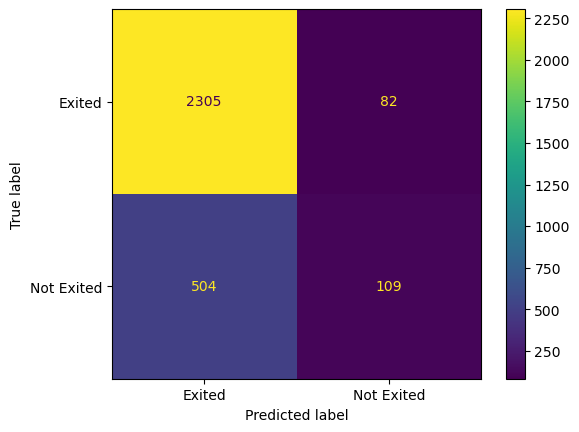

In [30]:
# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Exited','Not Exited']).plot()

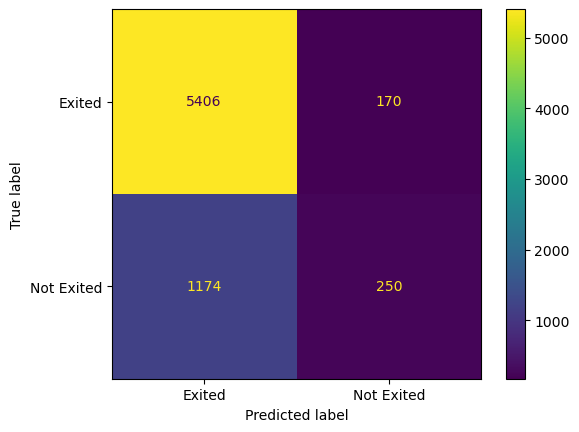

In [31]:
# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Exited','Not Exited']).plot()

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(random_state=21)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
print(f'Train accuracy of the model is: {round(accuracy_score(y_train, rfc.predict(X_train))*100,2)} %')
print(f'Train precision of the model is: {round(precision_score(y_train, rfc.predict(X_train))*100,2)} %')
print(f'Train recall of the model is: {round(recall_score(y_train, rfc.predict(X_train))*100,2)} %')
print('-'*40)
print(f'Test accuracy of the model is: {round(accuracy_score(y_test, y_pred)*100,2)} %')
print(f'Test precision of the model is: {round(precision_score(y_test, y_pred)*100,2)} %')
print(f'Test recall of the model is: {round(recall_score(y_test, y_pred)*100,2)} %')

Train accuracy of the model is: 100.0 %
Train precision of the model is: 100.0 %
Train recall of the model is: 100.0 %
----------------------------------------
Test accuracy of the model is: 85.83 %
Test precision of the model is: 74.77 %
Test recall of the model is: 45.79 %


In [37]:
cm_train = confusion_matrix(y_train, rfc.predict(X_train))
cm_test = confusion_matrix(y_test, rfc.predict(X_test))

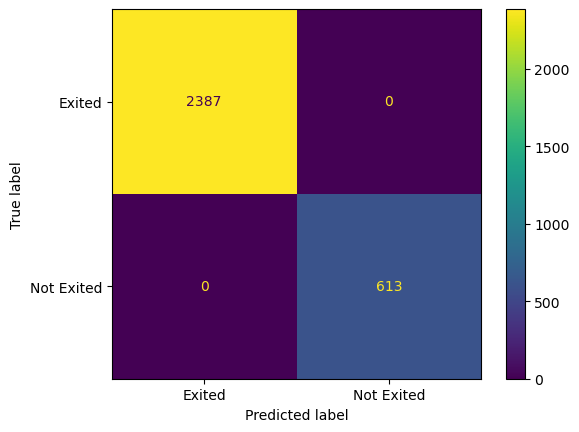

In [38]:
# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Exited','Not Exited']).plot()

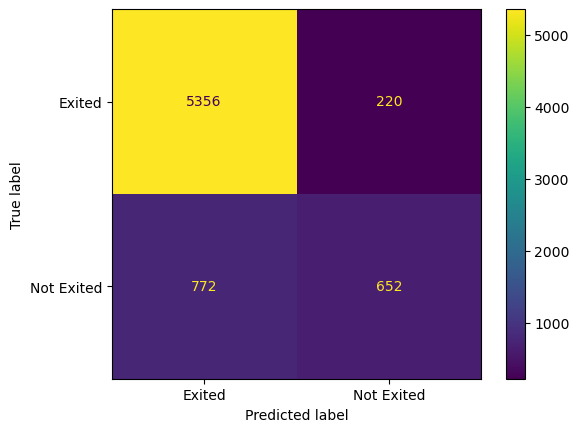

In [39]:
# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Exited','Not Exited']).plot()

### Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gbc = GradientBoostingClassifier(random_state=21)

In [42]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=21)

In [43]:
y_pred = gbc.predict(X_test)

In [44]:
print(f'Train accuracy of the model is: {round(accuracy_score(y_train, gbc.predict(X_train))*100,2)} %')
print(f'Train precision of the model is: {round(precision_score(y_train, gbc.predict(X_train))*100,2)} %')
print(f'Train recall of the model is: {round(recall_score(y_train, gbc.predict(X_train))*100,2)} %')
print('-'*40)
print(f'Test accuracy of the model is: {round(accuracy_score(y_test, y_pred)*100,2)} %')
print(f'Test precision of the model is: {round(precision_score(y_test, y_pred)*100,2)} %')
print(f'Test recall of the model is: {round(recall_score(y_test, y_pred)*100,2)} %')

Train accuracy of the model is: 88.6 %
Train precision of the model is: 85.38 %
Train recall of the model is: 53.34 %
----------------------------------------
Test accuracy of the model is: 85.97 %
Test precision of the model is: 74.02 %
Test recall of the model is: 47.82 %


In [45]:
cm_train = confusion_matrix(y_train, gbc.predict(X_train))
cm_test = confusion_matrix(y_test, gbc.predict(X_test))

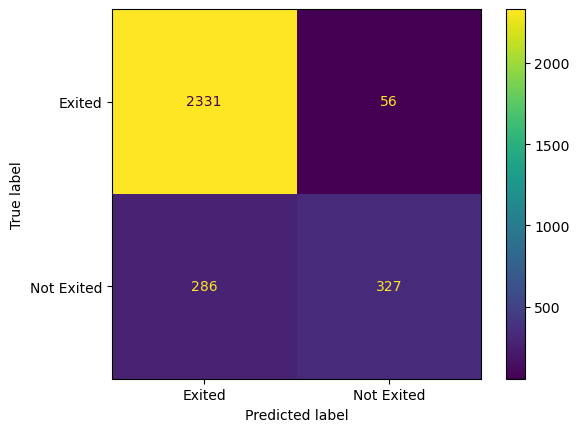

In [46]:
# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Exited','Not Exited']).plot()

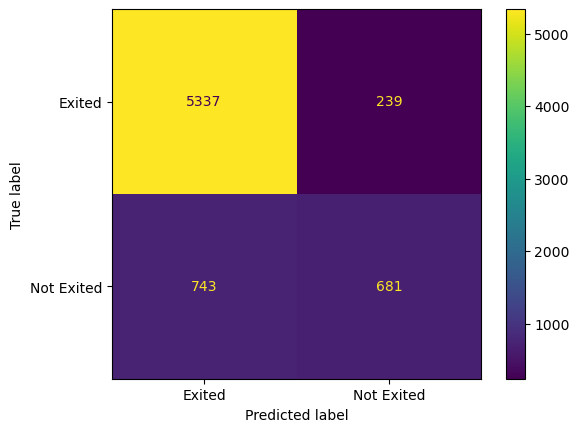

In [47]:
# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Exited','Not Exited']).plot()

# After SMOTE

In [48]:
df.Exited.value_counts()/df.shape[0]*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

##### Imbalance Dataset

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=21)

In [51]:
X_new, y_new = sm.fit_resample(X, y)

In [52]:
X_new.shape, y_new.shape

((15926, 10), (15926,))

In [53]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=21)

### Logistic Regression

In [54]:
model_new = LogisticRegression()

In [55]:
model_new.fit(X_train_new, y_train_new)

LogisticRegression()

In [56]:
y_pred_new = model_new.predict(X_test_new)

In [57]:
print(f'New train accuracy of the model is: {round(accuracy_score(y_train_new, model.predict(X_train_new))*100,2)} %')
print(f'New train precision of the model is: {round(precision_score(y_train_new, model.predict(X_train_new))*100,2)} %')
print(f'New train recall of the model is: {round(recall_score(y_train_new, model.predict(X_train_new))*100,2)} %')
print('-'*40)
print(f'New test accuracy of the model is: {round(accuracy_score(y_test_new, y_pred_new)*100,2)} %')
print(f'New test precision of the model is: {round(precision_score(y_test_new, y_pred_new)*100,2)} %')
print(f'New test recall of the model is: {round(recall_score(y_test_new, y_pred_new)*100,2)} %')

New train accuracy of the model is: 50.51 %
New train precision of the model is: 50.49 %
New train recall of the model is: 99.91 %
----------------------------------------
New test accuracy of the model is: 66.66 %
New test precision of the model is: 65.01 %
New test recall of the model is: 68.93 %


In [58]:
cm_train_new = confusion_matrix(y_train_new, model.predict(X_train_new))
cm_test_new = confusion_matrix(y_test_new, model.predict(X_test_new))

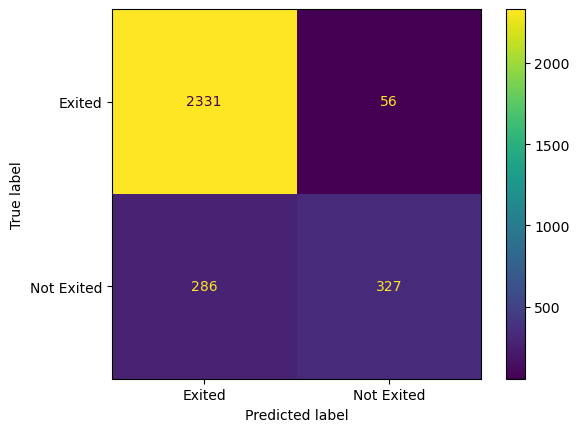

In [59]:
# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Exited','Not Exited']).plot()

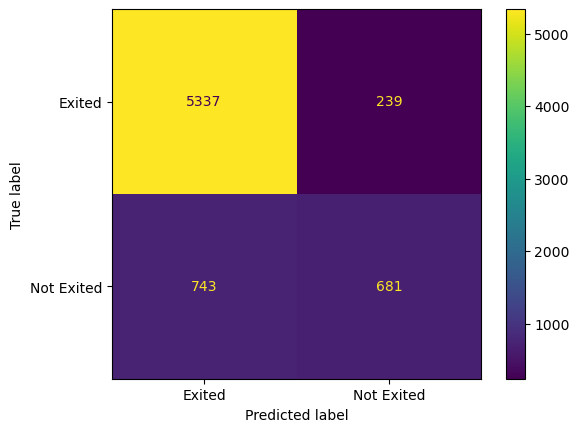

In [60]:
# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Exited','Not Exited']).plot()

### Random Forest

In [61]:
rfc_new = RandomForestClassifier(random_state=21)
rfc_new.fit(X_train_new, y_train_new)
y_pred_new = rfc_new.predict(X_test_new)

In [62]:
print(f'Train accuracy of the model is: {round(accuracy_score(y_train_new, rfc_new.predict(X_train_new))*100,2)} %')
print(f'Train precision of the model is: {round(precision_score(y_train_new, rfc_new.predict(X_train_new))*100,2)} %')
print(f'Train recall of the model is: {round(recall_score(y_train_new, rfc_new.predict(X_train_new))*100,2)} %')
print('-'*40)
print(f'Test accuracy of the model is: {round(accuracy_score(y_test_new, y_pred_new)*100,2)} %')
print(f'Test precision of the model is: {round(precision_score(y_test_new, y_pred_new)*100,2)} %')
print(f'Test recall of the model is: {round(recall_score(y_test_new, y_pred_new)*100,2)} %')

Train accuracy of the model is: 100.0 %
Train precision of the model is: 100.0 %
Train recall of the model is: 100.0 %
----------------------------------------
Test accuracy of the model is: 85.1 %
Test precision of the model is: 84.5 %
Test recall of the model is: 85.15 %


In [63]:
cm_train_new = confusion_matrix(y_train_new, rfc_new.predict(X_train_new))
cm_test_new = confusion_matrix(y_test_new, rfc_new.predict(X_test_new))

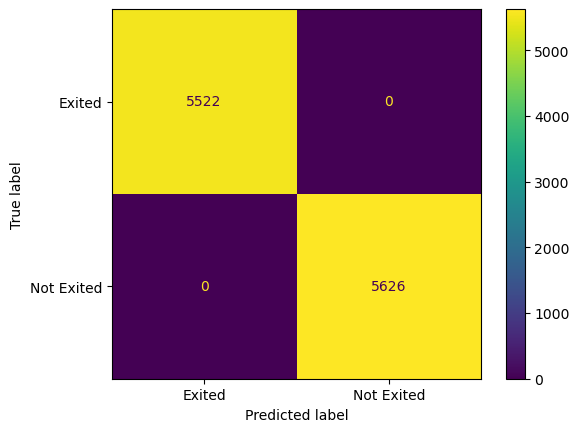

In [64]:
# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train_new, display_labels=['Exited','Not Exited']).plot()

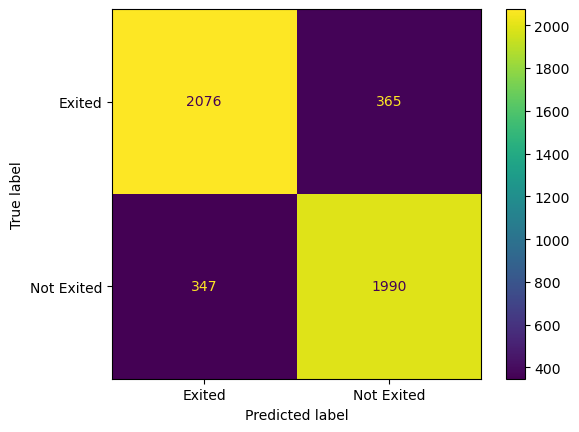

In [65]:
# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=['Exited','Not Exited']).plot()

### Gradient Boosting

In [66]:
gbc_new = GradientBoostingClassifier(random_state=21)
gbc_new.fit(X_train_new, y_train_new)
y_pred_new = gbc_new.predict(X_test_new)

In [67]:
print(f'Train accuracy of the model is: {round(accuracy_score(y_train_new, gbc_new.predict(X_train_new))*100,2)} %')
print(f'Train precision of the model is: {round(precision_score(y_train_new, gbc_new.predict(X_train_new))*100,2)} %')
print(f'Train recall of the model is: {round(recall_score(y_train_new, gbc_new.predict(X_train_new))*100,2)} %')
print('-'*40)
print(f'Test accuracy of the model is: {round(accuracy_score(y_test_new, y_pred_new)*100,2)} %')
print(f'Test precision of the model is: {round(precision_score(y_test_new, y_pred_new)*100,2)} %')
print(f'Test recall of the model is: {round(recall_score(y_test_new, y_pred_new)*100,2)} %')

Train accuracy of the model is: 85.27 %
Train precision of the model is: 85.9 %
Train recall of the model is: 84.71 %
----------------------------------------
Test accuracy of the model is: 83.07 %
Test precision of the model is: 83.19 %
Test recall of the model is: 81.94 %


In [68]:
cm_train_new = confusion_matrix(y_train_new, gbc_new.predict(X_train_new))
cm_test_new = confusion_matrix(y_test_new, gbc_new.predict(X_test_new))

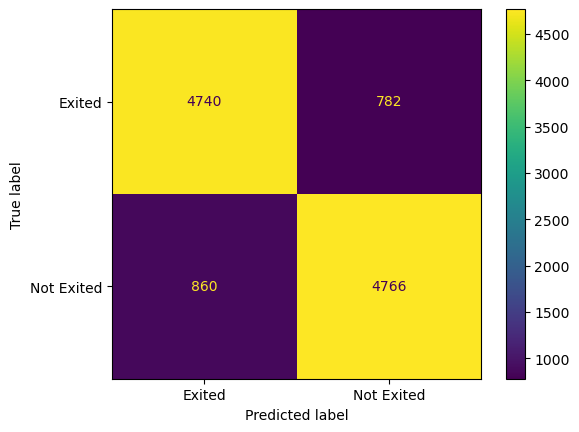

In [69]:
# Train Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_train_new, display_labels=['Exited','Not Exited']).plot()

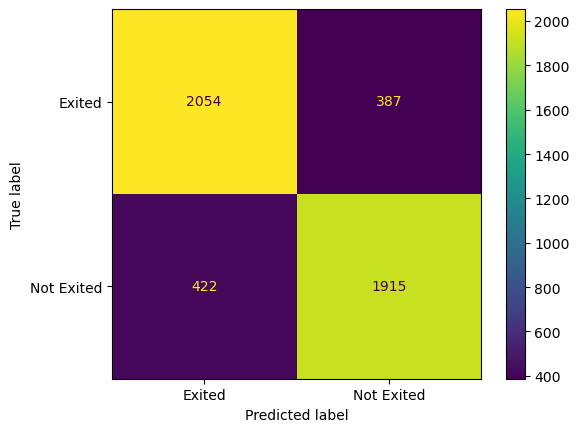

In [70]:
# Test Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_test_new, display_labels=['Exited','Not Exited']).plot()

Out of all models Gradient Boosting with SMOTE is the best it has good recall score too which is very important for chur prediction

## After SMOTE the Recall Score increase and for in this case which model has more Recall Score are more good to have